# Naive Bayes classifier

Naive Bayes classifier where each pixel is distributed according to a Beta distribution of parameters α, β:
$d(x ; \alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)} x^{\alpha - 1} (1-x)^{\beta - 1}$

P.S. For a discussion about maximum likelihood for the parameters of a beta distribution you can look here. However, for this assignment the estimators obtained with the moments approach will be fine:

$$
\begin{aligned}
    & \alpha = KE[X] \\
    & \beta = K(1 - E[X]) \\
    & K = \frac{
        E[X](1 - E[X])
    }{
        Var[X]
    } - 1
\end{aligned}
$$

Note:
$α/(α+β)$ is the mean of the beta distribution.
if you compute the mean for each of the 784 models and reshape them into 28x28 images you can have a visual indication of what the model is learning.

# Setup
Let us import the required modules.

In [1]:
import time

from loguru import logger
from src.classifiers.naivebayes import Beta_NB
import src.utilities.data_split as ds
import src.utilities.evaluation as eva

## Load Data
Note that the dataset is already split into Train-Test sets.

In [2]:
data_split = ds.TrainTestSplit.from_csv_directory(dir_path="../data")

In [3]:
data_split.x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 784 columns):
 #    Column    Dtype  
---   ------    -----  
 0    pixel1    float64
 1    pixel2    float64
 2    pixel3    float64
 3    pixel4    float64
 4    pixel5    float64
 5    pixel6    float64
 6    pixel7    float64
 7    pixel8    float64
 8    pixel9    float64
 9    pixel10   float64
 10   pixel11   float64
 11   pixel12   float64
 12   pixel13   float64
 13   pixel14   float64
 14   pixel15   float64
 15   pixel16   float64
 16   pixel17   float64
 17   pixel18   float64
 18   pixel19   float64
 19   pixel20   float64
 20   pixel21   float64
 21   pixel22   float64
 22   pixel23   float64
 23   pixel24   float64
 24   pixel25   float64
 25   pixel26   float64
 26   pixel27   float64
 27   pixel28   float64
 28   pixel29   float64
 29   pixel30   float64
 30   pixel31   float64
 31   pixel32   float64
 32   pixel33   float64
 33   pixel34   float64
 34   pixel35   float64
 3

In [4]:
data_split.y_train.shape

(60000,)

## Tuning

No hyper-parameters to tune

## Model Training

In [5]:
start_time = time.time()
b_nb=Beta_NB()
b_nb.fit(data_split.x_train, data_split.y_train)
logger.info("--- %s seconds ---" % (time.time() - start_time))

2022-12-28 17:49:03.927 | INFO     | __main__:<module>:4 - --- 3.434068202972412 seconds ---


Visual indication of what the model is learning using the mean of the beta distribution

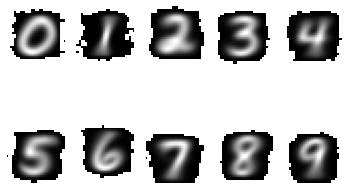

In [6]:
b_nb.plot_beta_means()

# Performance

In [ ]:
start_time = time.time()
b_nb_test_pred = b_nb.predict(data_split.x_test)
logger.info("Prediction: - %s seconds -" % (time.time() - start_time))
b_nb_test_eval = eva.Evaluation(y_true=data_split.y_test, y_pred=b_nb_test_pred)

In [ ]:
print("Testing:")
b_nb_test_eval.acc_eval()

In [ ]:
# save the model and evaluation
b_nb_model = eva.EvaluatedModel(b_nb, "beta_naivebayes", test_eval=b_nb_test_eval)
b_nb_model.save_evaluation()

In [ ]:
# load the previously saved model and evaluations
b_nb_model = eva.EvaluatedModel.load_evaluation("beta_naivebayes")

### Confusion Matrix

In [ ]:
b_nb_model.test_eval.conf_mat()